Few Important Points

1) All data points are associated with a point in time - ie. timestamp.
2) All data points in the time series data must be equally spaced in time.
3) Patterns observed in time series are expected to persist in future.
4) The values of time series are affected by the outside factors and by the values of past periods.

Seasonality - Patterns occuring at regular intervals in the time series data. It is different from cyclicity,
which is the fluctuation in values at irregular intervals of time.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
raw_csv_data = pd.read_csv("data/Index2018.csv")

In [4]:
df_comp = raw_csv_data.copy()

In [5]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [6]:
df_comp.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [7]:
df_comp.spx.isna().sum()

0

Text(0.5, 1.0, 'S&P vs FTSE')

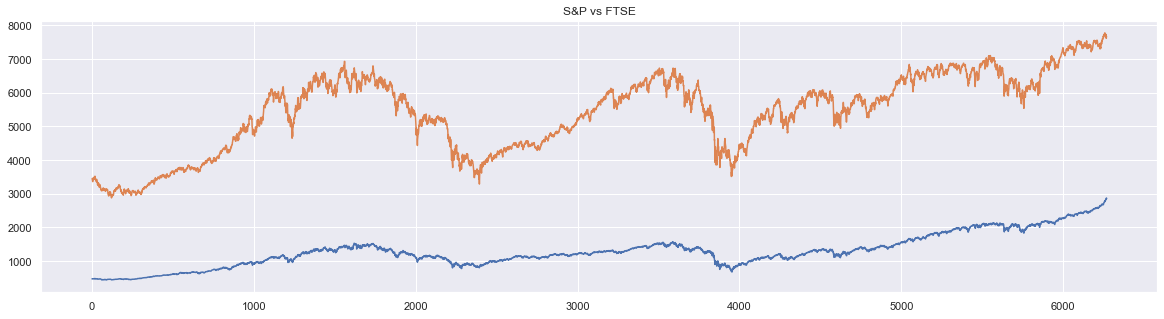

In [8]:
df_comp.spx.plot(title = "S&P 500 Prices",figsize=(20,5))
df_comp.ftse.plot(title = "FTSE 100 Prices",figsize=(20,5))
plt.title("S&P vs FTSE")

QQ Plots - These are graphs that indicate whether a varible is distributed normally around it's mean and standard deviation. How to interpret this? Think about it this way. We have 800 data points. Now let's take a standard normal distribution and divide it into 800 parts. ie. in a normal distribution of 800 points what should be the standard normal score of the lowest among the 800 points. Or, if 800 points were in a normal distribution where on the x axis would we expect the lowest point to lie. This is x in qqplot. Take the actual lowest point and claulate the z score for that - this is y. Plot x/y. If the distiribution were normal, then, the resultant plot should be a straight line.

In [9]:
import scipy.stats
import pylab

((array([-3.69357572, -3.46171913, -3.33410335, ...,  3.33410335,
          3.46171913,  3.69357572]),
  array([ 438.92    ,  441.49    ,  441.96    , ..., 2839.253031,
         2853.528411, 2872.867839])),
 (476.46056102841175, 1288.1275420815123, 0.9767273150948813))

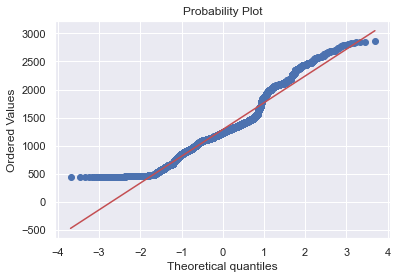

In [10]:
scipy.stats.probplot(df_comp.spx,plot = pylab)

In [11]:
df_comp.date.describe()

count           6269
unique          6269
top       07/01/1994
freq               1
Name: date, dtype: object

In [12]:
df_comp.date = pd.to_datetime(df_comp.date,format="%d/%m/%Y")

In [13]:
df_comp.date.describe()

/var/folders/g_/tkt2lv051zv8z_1rjnskg3hr0000gn/T/ipykernel_716/49469409.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_comp.date.describe()


count                    6269
unique                   6269
top       1994-01-07 00:00:00
freq                        1
first     1994-01-07 00:00:00
last      2018-01-29 00:00:00
Name: date, dtype: object

In [14]:
df_comp.set_index("date",inplace=True)

In [15]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [16]:
df_comp.date.describe()

AttributeError: 'DataFrame' object has no attribute 'date'

This fails because the date column is now the index of the data frame and is not freely accessible so that it cannot be modified. 

Setting the Desired Frequency

In [18]:
df_comp = df_comp.asfreq('b')

In [19]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


adfreq function takes in the fredquncy values - d for daily, h for hourly, a for annually etc. Also, we are using b here instead of d because we are only interested in business days.

Handling Missing Values.

Adding the asfreq could have introduced additional rows in the data set for which some of the column vales could be zero. Let us check.

In [21]:
df_comp.isna().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

We find that there are eight missing values here. There are several ways to handle missing data here. Front Fill - previous entry value, BAck Fill - Next entry value. etc. or combination of both. Populating allmissing values with mean or median is a bad idea here. This is because there are several time variant patterns here such as seasonality. Mean is usedful when the data shows a high variation around mean for every point and no other pattern.

In [26]:
df_comp.spx=df_comp.spx.fillna(method='ffill')
df_comp.ftse=df_comp.ftse.fillna(method='bfill')
df_comp.dax=df_comp.spx.fillna(value=df_comp.dax.mean())

In [27]:
df_comp.isna().sum()

spx       0
dax       0
ftse      0
nikkei    8
dtype: int64

In [29]:
df_comp['market_value'] = df_comp.spx

In [30]:
df_comp.describe()

,spx,dax,ftse,nikkei,market_value
count,6277.000000,6277.000000,6277.000000,6269.000000,6277.000000
mean,1288.642547,1288.642547,5423.679824,14597.055700,1288.642547
std,487.868210,487.868210,1145.616719,4043.122953,487.868210
min,438.920000,438.920000,2876.600000,7054.980000,438.920000
25%,992.715221,992.715221,4486.730000,10709.290000,992.715221
50%,1233.761241,1233.761241,5663.300000,15028.170000,1233.761241
75%,1460.250000,1460.250000,6304.630175,17860.470000,1460.250000
max,2872.867839,2872.867839,7778.637689,24124.150000,2872.867839


In [32]:
del df_comp['spx'],df_comp['dax'],df_comp['ftse'],df_comp['nikkei']

In [33]:
df_comp

,market_value
date,
1994-01-07,469.900000
1994-01-10,475.270000
1994-01-11,474.130000
1994-01-12,474.170000
1994-01-13,472.470000
...,...
2018-01-23,2839.130362
2018-01-24,2837.544008
2018-01-25,2839.253031


Splitting the Data - The data needs to be split amongst the training set and the test set. For other machine learning algorithms, the data is generally shuffled, which is not possible n the case of time series, since the training set must have values for every consecutive time point. SO the data is split at a point in the time series. Points before this time form the training set and the pints after this time form the test set.

In [35]:
size = int(len(df_comp)*0.8)

In [36]:
df = df_comp.iloc[:size]

In [37]:
df_test = df_comp.iloc[size:]

In [38]:
df.tail()

,market_value
date,
2013-04-01,1562.173837
2013-04-02,1570.252238
2013-04-03,1553.686978
2013-04-04,1559.979316
2013-04-05,1553.278930


In [39]:
df_test.head()

,market_value
date,
2013-04-08,1563.071269
2013-04-09,1568.607909
2013-04-10,1587.731827
2013-04-11,1593.369863
2013-04-12,1588.854623
